# Group 1 - Hotel Search Engine
### Sulaiman Alkurbi | Sattam AlMuwallad | Salman AlShawmar

# Load Dataset

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

ds = load_dataset("traversaal-ai-hackathon/hotel_datasets")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df = ds['train'].to_pandas()
df.to_csv("data.csv", index=False)

In [ ]:
# !pip install pandas_profiling
!pip install sweetviz

# EDA

In [ ]:
import sweetviz as sv

# Generate and display the report
report = sv.analyze(df)
report.show_html('report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



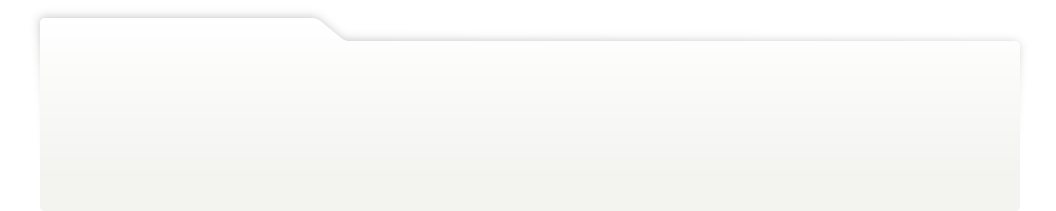
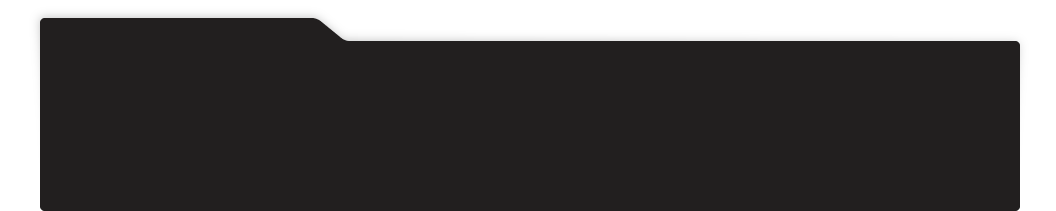
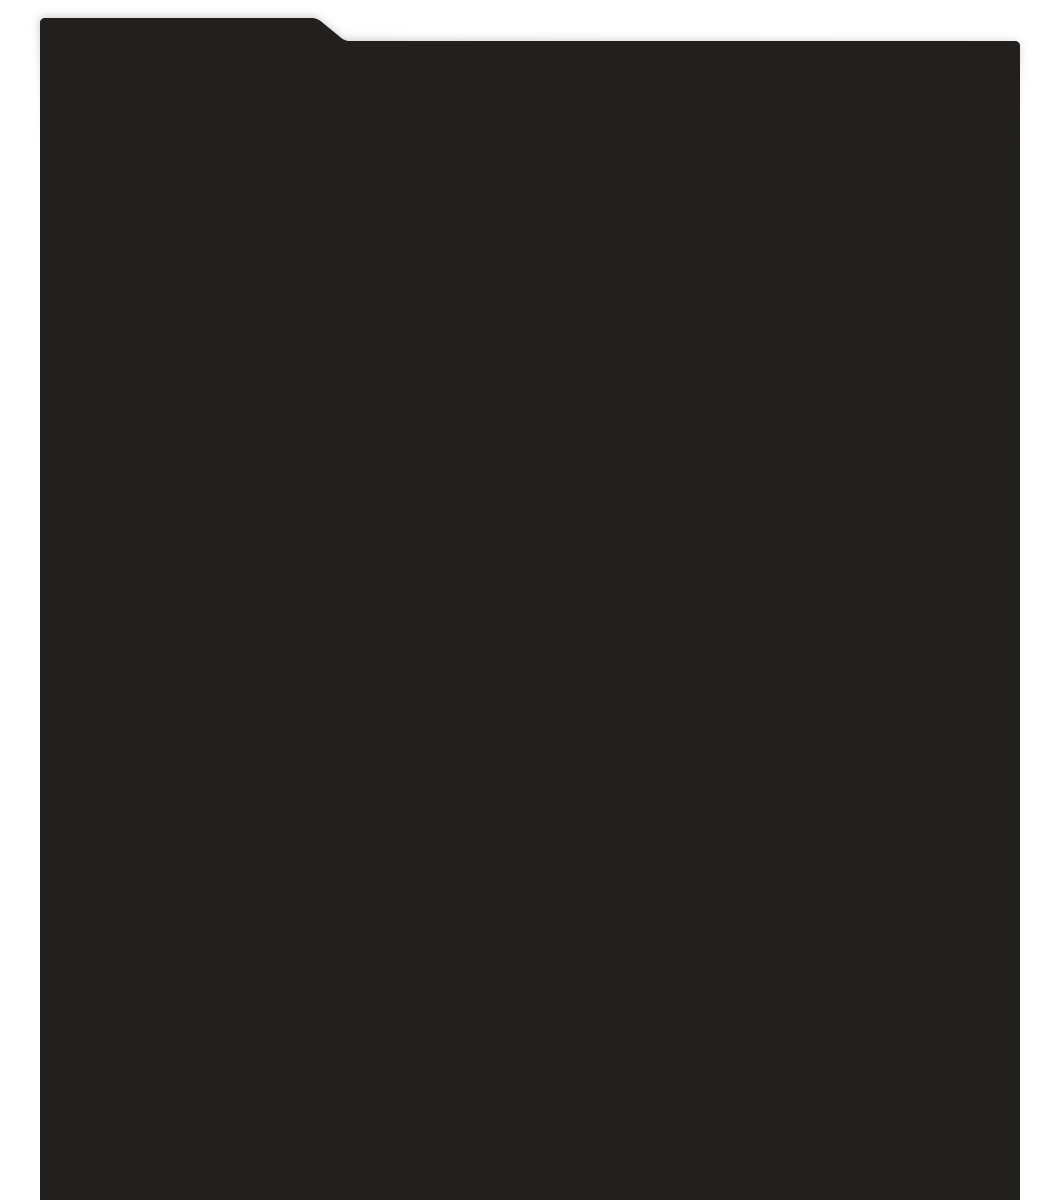
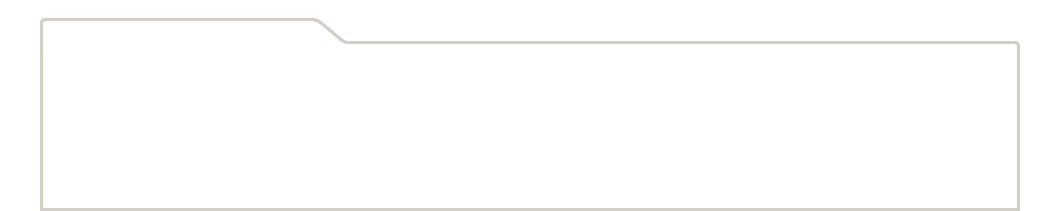
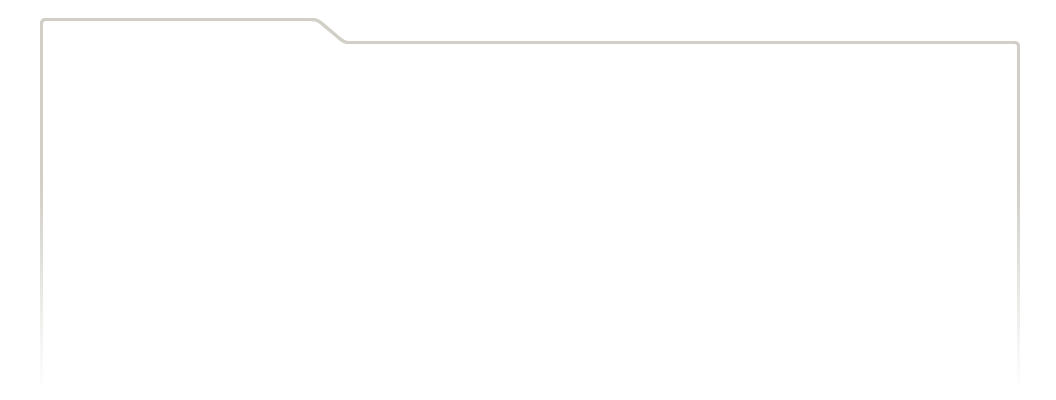
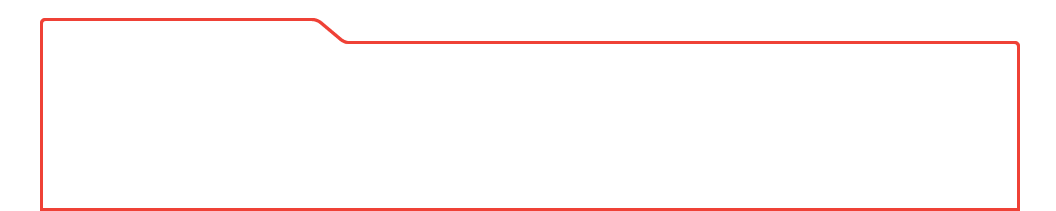
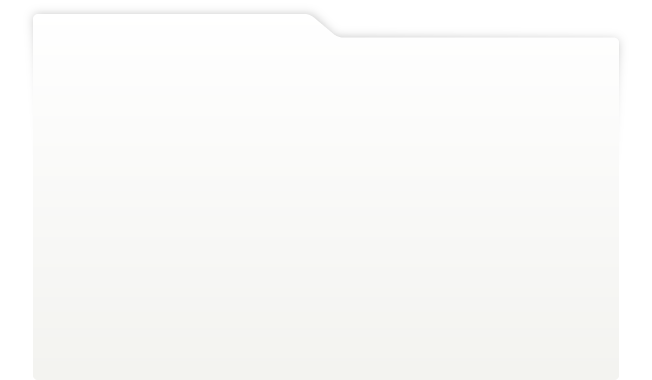
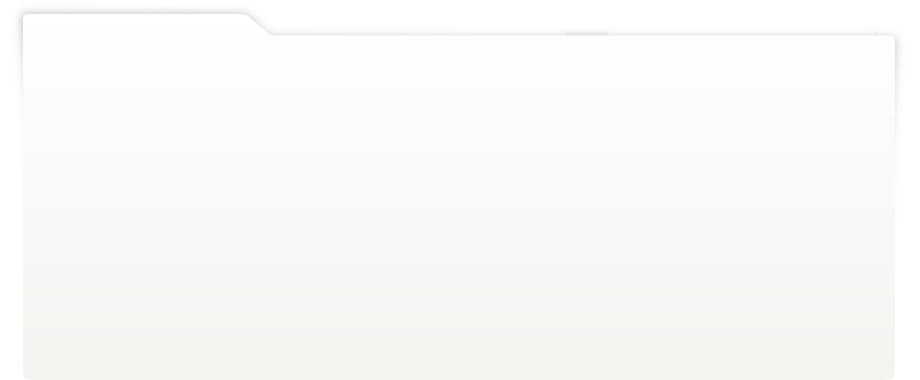
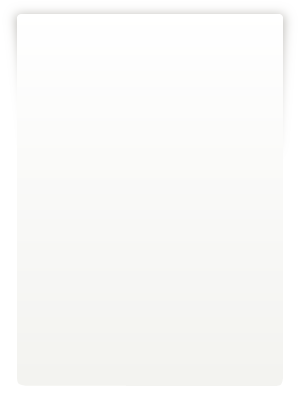
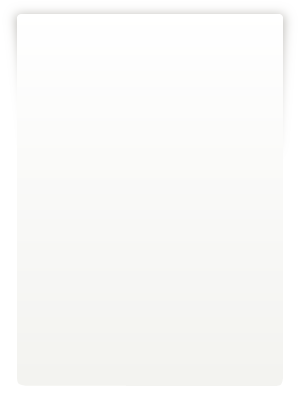
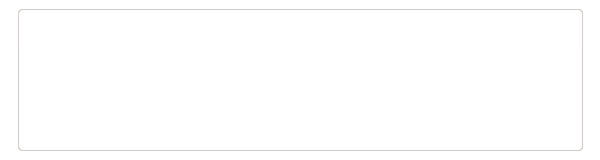
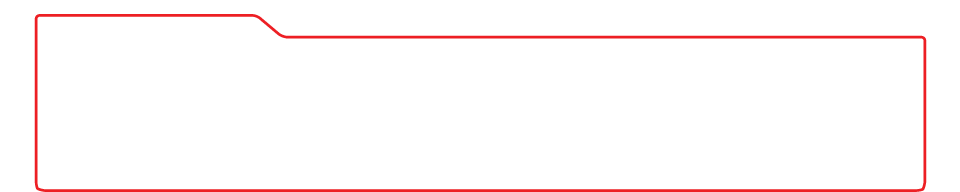
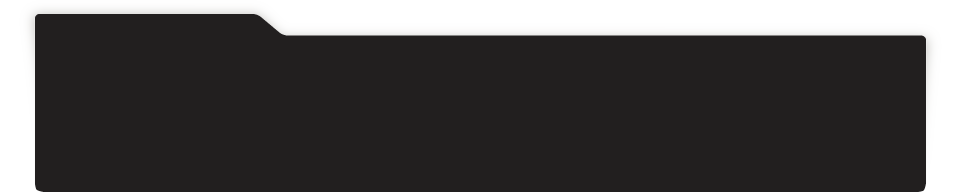
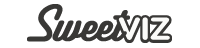
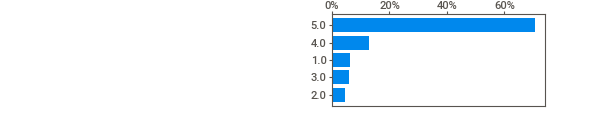
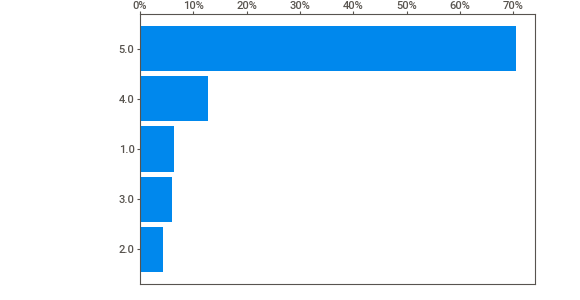
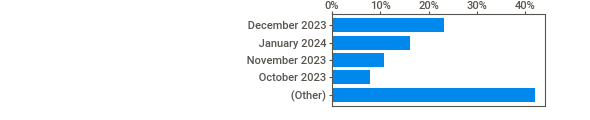
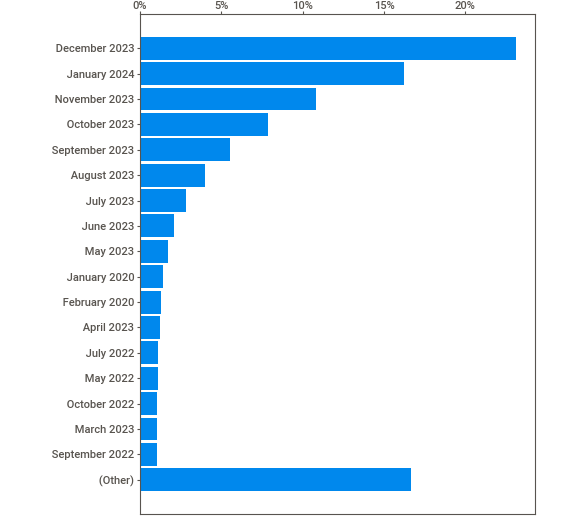
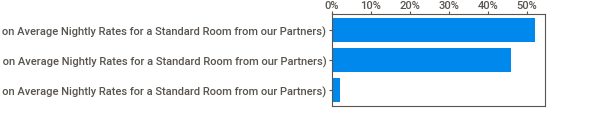
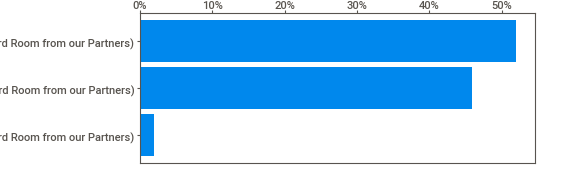
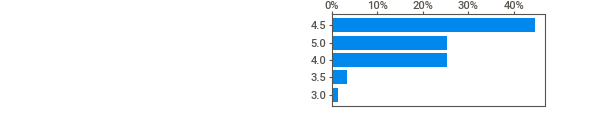
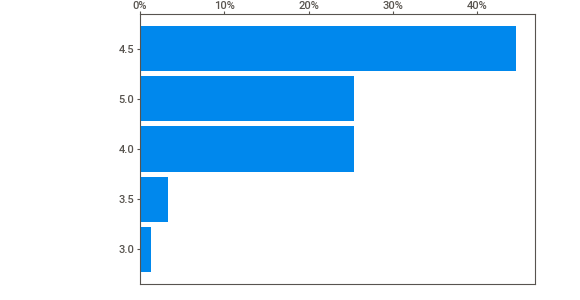
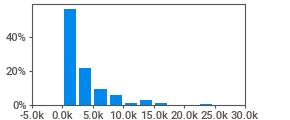
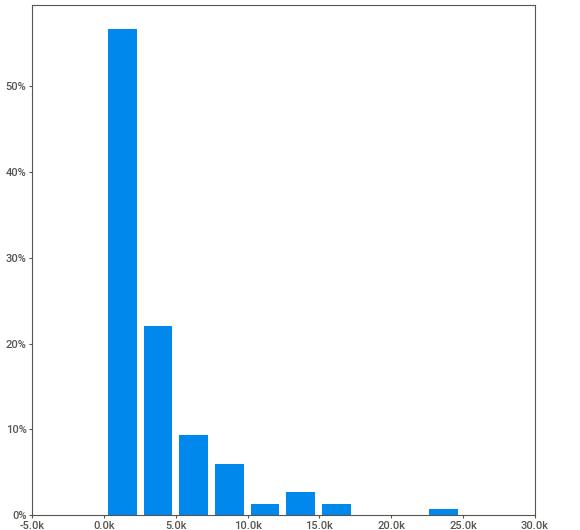
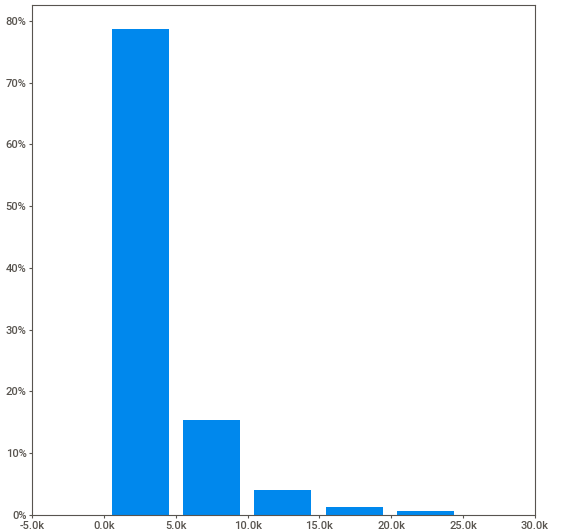
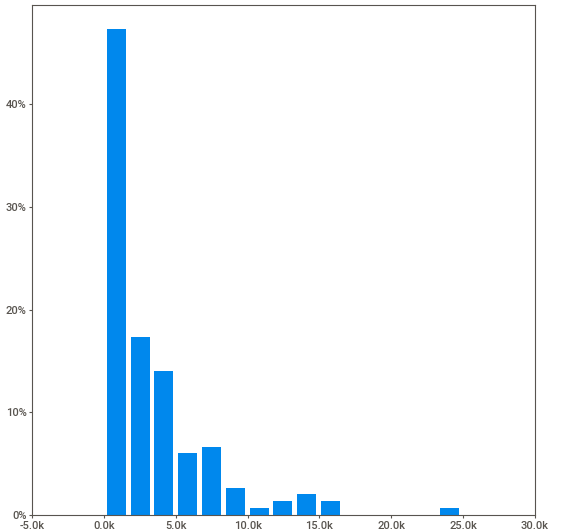
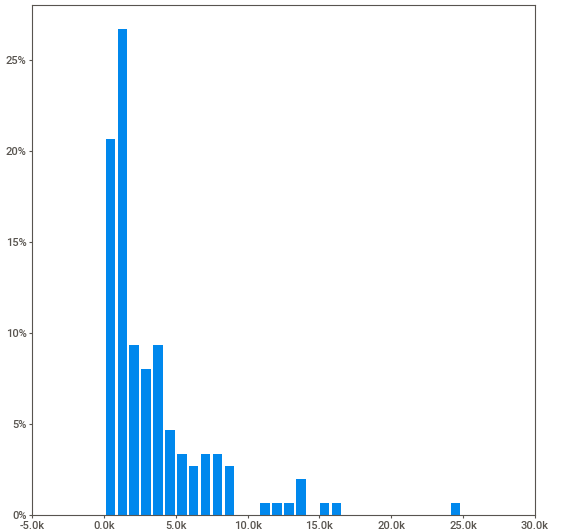
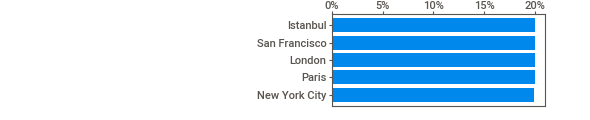
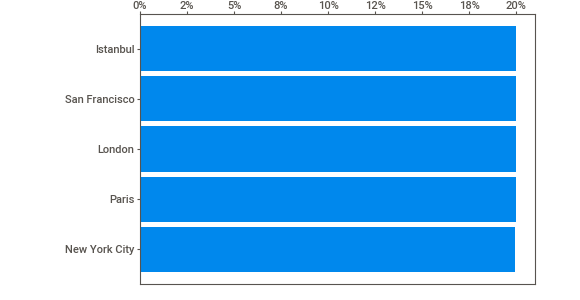
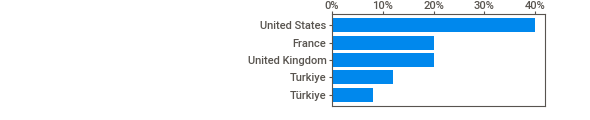
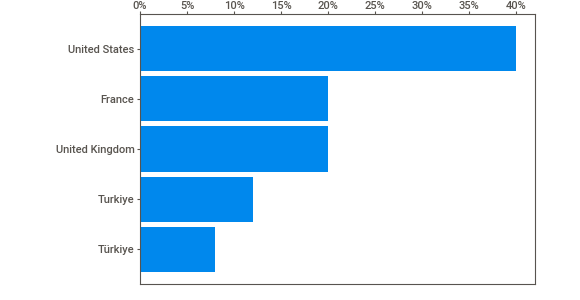
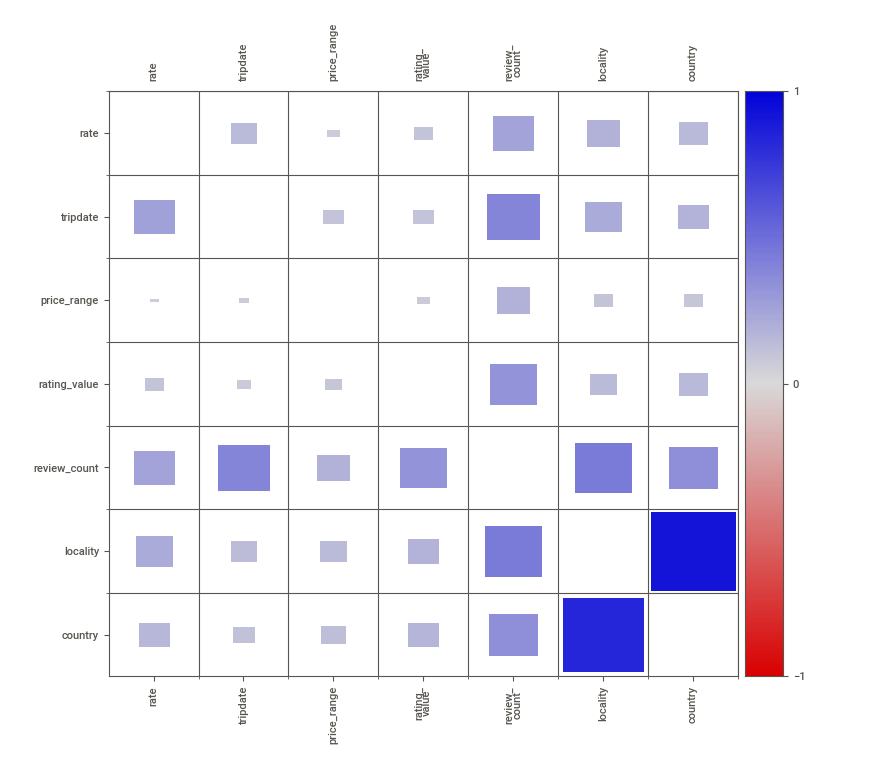
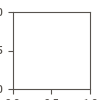

In [ ]:
from IPython.display import display, HTML

display(HTML("report.html"))

# Data Cleaning

In [ ]:
df["country"] = df["country"].replace("Türkiye", "Turkiye")

In [ ]:
df['hotel_description'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5997 entries, 0 to 5996
Series name: hotel_description
Non-Null Count  Dtype 
--------------  ----- 
5197 non-null   object
dtypes: object(1)
memory usage: 47.0+ KB


In [ ]:
df['hotel_description'].loc[0]

'Romance Istanbul Hotel has 39 rooms.Every room is elegantly furnished and harmonizes the modern life style with the traditional Ottoman touch. Romance Istanbul sits at the intersection of the old city’s most important part. With its luxuriously inspiring design and landmark old city location, steeped in the history of its surroundings, Romance Istanbul Hotel welcomes you with exceptional designed rooms and world-renowned Turkish hospitality. Our colleagues deliver the most personal service. It is perfectly placed and perfectly designed to enhance all that Istanbul has to offer. Each room offers a private bathroom and shower. Each is equipped with a satellite TV and free wifi connection. The rooms size change between 20 m2 and 45 m2. It includes 7 suite rooms: 1 Royal Suite, 4 Grand Suite, 1 Romance Suite and 1 Premium Suite, 2 Luxury Room With Terrace, 22 Deluxe Room, 8 City Room.'

In [ ]:
import pandas as pd
df[df['hotel_description'].isna()]['hotel_name'].unique()

array(['Primero Hotel', 'Beacon Grand A Union Square Hotel',
       'Hilton San Francisco Financial District',
       'Cow Hollow Inn and Suites',
       'Parc 55 San Francisco - a Hilton Hotel',
       'Park Grand London Hyde Park', 'Travelodge London City hotel',
       'Leonardo Royal Hotel London Tower Bridge',
       'Travelodge London Docklands Central',
       'Travelodge London Central Kings Cross', 'Travelodge London Excel',
       'Travelodge London Central City Road', 'Royal National Hotel',
       'Palmers Lodge Swiss Cottage',
       'Tempo by Hilton New York Times Square',
       'Park Central Hotel New York', 'Hilton New York Times Square',
       'Hotel La Comtesse', 'Hotel B55', 'Citadines Tour Eiffel Paris'],
      dtype=object)

## Fill missing values

In [ ]:
na_hotels_desc = {
    "Primero Hotel": "Looking for a place to stay in Istanbul? Then look no further than Primero Hotel, a romantic hotel that brings the best of Istanbul to your doorstep. Free wifi is offered to guests, and rooms at Primero Hotel offer air conditioning and a minibar. During your stay, take advantage of some of the amenities offered, including room service. Guests of Primero Hotel are also welcome to enjoy free breakfast, located on site. Nearby landmarks such as Suleymaniye Mosque (0.7 mi) and Istiklal Street (1.7 mi) make Primero Hotel a great place to stay when visiting Istanbul.",
    "Beacon Grand A Union Square Hotel": "Situated in San Francisco, 200 metres from Union Square, Beacon Grand, A Union Square Hotel features accommodation with a fitness centre, private parking, a restaurant and a bar. With free WiFi, this 4-star hotel offers a 24-hour front desk and a concierge service. The property is 400 metres from the city centre and 1.2 km from Moscone Center. The hotel will provide guests with air-conditioned rooms offering a desk, a coffee machine, a fridge, a safety deposit box, a flat-screen TV and a private bathroom with a shower. At Beacon Grand, A Union Square Hotel rooms include bed linen and towels. Coit Tower is 1.9 km from the accommodation, while San Francisco City Hall is 1.7 km from the property. The nearest airport is San Francisco International Airport, 20 km from Beacon Grand, A Union Square Hotel.",
    "Hilton San Francisco Financial District": "Stay in a central location in San Francisco, California, surrounded by the bustling neighborhoods of North Beach, Chinatown and the Financial District. Soaring 27 floors above the vibrant city, the Hilton San Francisco Financial District hotel boasts stunning bay and city views. Enjoy a downtown retreat providing an easy walking distance to Moscone Convention Center, Union Square, Fisherman's Wharf, Market Street, Chase Center, Saleforce Tower, and the Embarcadero. Unwind after a busy day in San Francisco with a coffee or local Merlot at Flyte Coffee & Wine Bar while enjoying complimentary access to iPads. Dine on gourmet cuisine in the relaxed yet sophisticated atmosphere of 750 Restaurant & Bar. Boasting 20,000 sq. ft. of event space, this downtown San Francisco hotel is ideal for business or social gatherings. Enjoy a choice of contemporary meeting rooms and a Grand Ballroom with floor-to-ceiling windows and city views.",
    "Cow Hollow Inn and Suites": "Finding an ideal motel in San Francisco does not have to be difficult. Welcome to Cow Hollow Inn and Suites, a nice option for travelers like you. Rooms at Cow Hollow Hotel provide a flat screen TV and air conditioning, and guests can stay connected with free wifi. In addition, while staying at Cow Hollow Hotel guests have access to a 24 hour front desk and baggage storage. Need a place to park? Free parking is available at Cow Hollow Hotel San Francisco. For those interested in checking out popular landmarks while visiting San Francisco, Cow Hollow San Francisco is located a short distance from Fisherman's Wharf (1.3 mi) and Pier 39 (1.6 mi). While visiting San Francisco, you may want to try some gyros at one of the nearby restaurants, such as Souvla, Oasis Grill, or Park Gyros. There is no shortage of things to do in the area: explore popular military museums such as USS Pampanito and WWII Pacific War Memorial. Cow Hollow Inn and Suites puts the best of San Francisco at your fingertips, making your stay both relaxing and enjoyable.",
    "Parc 55 San Francisco - a Hilton Hotel": "Daily Mandatory Destination Charge includes: Premium guest internet access; daily $35 food and beverage credit for use in on-site Cable 55 restaurant and off-site Hilton Union Square outlets; 2-hour e-bike rental for up to 2 guests. Experience the cosmopolitan charm of San Francisco at Parc 55. Our location allows access to the city's most vibrant neighborhoods, each with a distinct personality: Union Square, Mid-Market, Fisherman's Wharf, North Beach, Chinatown, Japan Town, SOMA and the Mission. Parc 55 puts you in the heart of San Francisco's best shopping, dining, entertainment and more. As part of the Hilton family of hotels, we understand the importance of quality and consistency, and value the loyalty of our returning guests. Combining top-of-the-line amenities and facilities with a boutique heart, Parc 55 offers personal connections through thoughtful service and attention to detail.",
    "Park Grand London Hyde Park": "Experience elegance and luxury at Park Grand Hyde Park Hotel, where contemporary sophistication meets timeless charm. Nestled in the heart of London, our boutique hotel offers an unparalleled blend of comfort and convenience. Indulge in stylishly designed rooms and suites, meticulously crafted to cater to your every need. Whether you're here for business or leisure, our attentive staff ensures a seamless stay from start to finish. Wake up to a sumptuous breakfast spread and explore the vibrant surroundings, including the iconic Hyde Park just moments away. Unwind in our tranquil spa or savor delectable cuisine at our onsite restaurant. With state-of-the-art facilities and impeccable service, Park Grand Hyde Park Hotel promises an unforgettable experience for discerning travelers. Book your stay with us and discover the epitome of luxury hospitality in London.remembering.",
    "Travelodge London City hotel": "Travelodge London City hotel is an excellent choice for travelers visiting London, offering a family-friendly environment alongside many helpful amenities designed to enhance your stay. You’ll enjoy relaxing rooms that offer a flat screen TV, and you can stay connected during your stay as Travelodge London City hotel offers guests paid wifi. Plus, Travelodge London City hotel offers an on-site restaurant, providing a pleasant respite from your busy day. Nearby landmarks such as Covent Garden (2.1 mi) and Coca-Cola London Eye (2.1 mi) make Travelodge London City hotel a great place to stay when visiting London. While in London, you may want to check out some of the restaurants that are a short walk away from Travelodge London City hotel, including Coppa Club - Tower Bridge (0.5 mi), Duck and Waffle (0.3 mi), and Aqua Shard (0.9 mi). Looking to explore? Then look no further than Tower of London (0.5 mi), Sky Garden (0.5 mi), and The View from The Shard (0.9 mi), which are some popular London attractions – all conveniently located within walking distance of the hotel. Enjoy your stay in London!",
    "Leonardo Royal Hotel London Tower Bridge": "Located in London and with Tower of London reachable within a 11-minute walk, Leonardo Royal London Tower Bridge has concierge services, non-smoking rooms, a shared lounge, free WiFi throughout the property and a bar. Offering a restaurant, the property also has a fitness center, as well as an indoor pool and a sauna. The hotel features a hot tub and room service. The hotel will provide guests with air-conditioned rooms with a desk, a coffee machine, a safety deposit box, a flat-screen TV and a private bathroom with a shower. At Leonardo Royal London Tower Bridge rooms have bed linen and towels. A buffet breakfast is available each morning at the accommodation. Languages spoken at the reception include English, Spanish, French and Italian, and guests are invited to request advice on the area when needed. Popular points of interest near Leonardo Royal London Tower Bridge include Tower Bridge, Sky Garden and Liverpool Street Tube Station. The nearest airport is London City Airport, 6.2 miles from the hotel.",
    "Travelodge London Docklands Central": "Local Attractions Our London Docklands Central hotel is located in the Docklands commerce development, once the world's biggest port. The site has excellent travel links such as East India DLR station, giving guests easy access to local attractions like the O2 Arena and ExCel London. London City Airport is also just a 10-minute drive away. Travel Links This hotel is perfect for business customers, located right off the A13 and located conveniently in Poplar Business park. Canary Wharf, a thriving commercial district perfect for shopping, is just a 15-minute ride away on the DLR. Within walking distance of the hotel is Billingsgate Market, the nation's largest inland seafood market and a scenic place for a bite to eat. Standard Double Rooms Unwind in a comfy king size bed, complete with four plump pillows and a cosy duvet. Guests will find this comfortable sleep spot in every standard room.",
    "Travelodge London Central Kings Cross": "Welcome to Travelodge London Central Kings Cross, your London “home away from home.” Travelodge London Central Kings Cross aims to make your visit as relaxing and enjoyable as possible, which is why so many guests continue to come back year after year. Close to some of London's most popular landmarks, such as Covent Garden (1.3 mi) and Coca-Cola London Eye (1.9 mi), Travel Lodge London is a great destination for tourists. Guest rooms offer a flat screen TV, and Travelodge London makes getting online easy as public wifi is available. In addition, guests can enjoy breakfast during their visit. While in London, you may want to check out some of the restaurants that are a short walk away from London Travelodge, including Hawksmoor Seven Dials (1.2 mi), Ye Olde Cheshire Cheese (1.2 mi), and ROKA Charlotte Street (1.0 mi). Should time allow, The British Museum is a popular attraction that is within walking distance. Travelodge London Central Kings Cross puts the best of London at your fingertips, making your stay both relaxing and enjoyable.",
    "Travelodge London Excel": "Finding an ideal quiet hotel in London does not have to be difficult. Welcome to Travelodge London Excel Hotel, a nice option for travelers like you. Given the close proximity of popular landmarks, such as Up at The O2 (1.7 mi) and Crossrail Place Roof Garden (2.4 mi), guests of Travelodge London Excel Hotel can easily experience some of London's most well known attractions. Public wifi is offered to guests, and rooms at Travelodge London Excel Hotel offer a flat screen TV. Guests of Travelodge London Excel Hotel are also welcome to enjoy breakfast, located on site. Travelers looking for Asian restaurants can head to ROKA Canary Wharf, Zaibatsu, or Kailash Momo Restaurant. If you’re looking for something to do, The Crystal (1.1 mi) is a nice way to spend some time, and it is within walking distance of Travelodge London Excel Hotel. Travelodge London Excel Hotel looks forward to welcoming you on your visit to London.",
    "Travelodge London Central City Road": "Finding an ideal family-friendly hotel in London does not have to be difficult. Welcome to Travelodge London Central City Road, a nice option for travelers like you. Travel Lodge London is a family-friendly hotel offering a flat screen TV and a desk in the rooms, and it is easy to stay connected during your stay as internet access is offered to guests. The hotel features a 24 hour front desk and 24 hour check-in. Plus, guests can enjoy breakfast, which has made this a popular choice among travelers visiting London. Close to some of London's most popular landmarks, such as The View from The Shard (1.3 mi) and Tower Bridge (1.3 mi), Travelodge London Central Moorgate Hotel is a great destination for tourists. If you like Asian restaurants, London Travel Lodge is conveniently located near Dishoom Covent Garden, SUSHISAMBA Liverpool Street, and StreetXO. Plus, during your trip, don’t forget to check out some of the popular history museums, such as The British Museum, Natural History Museum, and Churchill War Rooms. Travelodge London Central City Road puts the best of London at your fingertips, making your stay both relaxing and enjoyable.",
    "Royal National Hotel": "Our unique and lively hotel located in the heart of Russell Square, near Euston and Kings Cross, at the Royal National we offer a choice of room types to suit all occasions, from leisure breaks to business travel in Bloomsbury, central London. If travelling on a budget, our standard rooms are extremely good value - providing clean and comfortable accommodation in the heart of London. Our Standard Plus rooms offer a touch more sophistication, with an earthy colour palette and contemporary furnishings. Fancy a bite to eat? Blooms Café serves up great coffee and delicious stone baked pizzas, whilst our London Pub offers British traditional dishes. Dine alfresco in our cosy courtyard, from a thoughtful menu of pub favourites, alongside local craft beers.",
    "Palmers Lodge Swiss Cottage": "Located in London, 1.5 miles from London Zoo, Palmers Lodge Swiss Cottage has accommodations with a garden, private parking, a shared lounge and a terrace. Among the facilities of this property are a restaurant, a shared kitchen and a 24-hour front desk, along with free WiFi throughout the property. Guests can have a drink at the bar. Guests at the hostel can enjoy a buffet or a continental breakfast. You can play table tennis and darts at the 4-star hostel. Lord's Cricket Ground is 1.6 miles from Palmers Lodge Swiss Cottage, while Camden Market is 2 miles from the property. The nearest airport is London City Airport, 12 miles from the accommodation.",
    "Tempo by Hilton New York Times Square": "Tempo By Hilton New York Times Square has a fitness center, shared lounge, a terrace and restaurant in New York. This 4-star hotel features free WiFi and a bar. The property is a few steps from the city center and a 6-minute walk from Radio City Music Hall. Speaking Bengali, Mandarin, English and Spanish at the reception, staff are always on hand to help. Popular points of interest near the hotel include Broadway Theatre, Times Square and Carnegie Hall. The nearest airport is LaGuardia Airport, 7.5 miles from Tempo By Hilton New York Times Square.",
    "Park Central Hotel New York": "Ideally set in the center of New York, Park Central has air-conditioned rooms, a fitness center, free WiFi and a shared lounge. This 4-star hotel offers an ATM and a business center. Guests can use a bar. At the hotel, rooms are equipped with a desk, a flat-screen TV, a private bathroom, bed linen and towels. All rooms are equipped with a safety deposit box and some have city views. At Park Central you'll find a restaurant serving Local cuisine. Vegetarian, dairy-free and vegan options can also be requested. Speaking German, English, Spanish and French at the reception, staff are willing to help at any time of the day. Popular points of interest near the accommodation include Broadway Theatre, Museum of Modern Art and Radio City Music Hall. The nearest airport is LaGuardia Airport, 6.8 miles from Park Central.",
    "Hilton New York Times Square": "Featuring a fitness center, a shared lounge as well as a bar, Hilton New York Times Square is located in the center of New York, a 4-minute walk from Times Square. This 4-star hotel offers room service and a 24-hour front desk. The property provides an ATM, and luggage storage for guests. The hotel offers an à la carte or American breakfast. At Hilton New York Times Square you'll find a restaurant serving American cuisine. Vegetarian, vegan and gluten-free options can also be requested. Popular points of interest near the accommodation include Bryant Park, Macy's and Radio City Music Hall. The nearest airport is LaGuardia Airport, 7.5 miles from Hilton New York Times Square.",
    "Hotel La Comtesse": "Finding an ideal romantic hotel in Paris does not have to be difficult. Welcome to Hotel La Comtesse, a nice option for travelers like you. The rooms offer a flat screen TV, air conditioning, and a minibar, and getting online is possible, as free wifi is available, allowing you to rest and refresh with ease. Hotel La Comtesse features a 24 hour front desk, a concierge, and room service. In addition, as a valued Hotel La Comtesse guest, you can enjoy a fitness center and breakfast that are available on-site. Guests arriving by vehicle have access to parking. For those interested in checking out popular landmarks while visiting Paris, Hotel La Comtesse is located a short distance from Louvre Museum (1.4 mi) and Arc de Triomphe (1.5 mi). While in Paris, you may want to check out some of the restaurants that are a short walk away from Hotel La Comtesse, including 58 Tour Eiffel (0.7 mi), Le Jules Verne (0.6 mi), and L'Avenue (0.9 mi). During your visit, be sure to check out popular attractions like Eiffel Tower (0.6 mi), Musée d'Orsay (1.0 mi), and Champs-Elysees (1.1 mi), which are all within walking distance of the hotel. Hotel La Comtesse puts the best of Paris at your fingertips, making your stay both relaxing and enjoyable.",
    "Hotel B55": "In a prime location in the 13th arr. District of Paris, Hôtel B55 is located 1.8 miles from Luxembourg Gardens, 2.4 miles from Sainte Chapelle and 2.5 miles from Gare de Lyon. Featuring a terrace, the 4-star hotel has air-conditioned rooms with free WiFi, each with a private bathroom. The property provides room service, and luggage storage for guests. All rooms are equipped with a desk and a flat-screen TV, and some units at the hotel have a balcony. All guest rooms will provide guests with a closet and a coffee machine. Buffet and continental breakfast options are available every morning at Hôtel B55. Speaking English, Spanish, French and Italian at the reception, staff are ready to help around the clock. Notre Dame is 2.6 miles from the accommodation, while Opéra Bastille is 3.1 miles away. The nearest airport is Paris - Orly, 6.8 miles from Hôtel B55, and the property offers a paid airport shuttle service.",
    "Citadines Tour Eiffel Paris": "Providing city views, Citadines Tour Eiffel Paris in Paris offers accommodations, free bikes, a garden, and a terrace. This 4-star condo hotel offers a 24-hour front desk and an elevator. The condo hotel provides rooms with air conditioning, available on site private parking, and an electric vehicle charging station. Featuring a fully equipped kitchen with a dishwasher and a microwave, each unit also comes with a safety deposit box, a satellite flat-screen TV, ironing facilities, desk, and a seating area. Every room includes a coffee machine, a private bathroom, and free Wifi, while selected rooms are equipped with a balcony and some have garden views. At the condo hotel, every unit includes bed linen and towels. Buffet and continental breakfast options with fruit, juice, and cheese are available daily at the condo hotel. There is a coffee shop and lounge. Sightseeing tours are available within easy reach of the property. Eiffel Tower is a 17-minute walk from Citadines Tour Eiffel Paris, while Rodin Museum is 1.2 miles away. The nearest airport is Paris - Orly Airport, 9.3 miles from the accommodation.",
}

In [ ]:
for hotel in na_hotels_desc.keys():
  df.loc[df['hotel_name'] == hotel, 'hotel_description'] = na_hotels_desc[hotel]

In [ ]:
for hotel in df['hotel_name'].unique():
  df['rate'].fillna(df[df['hotel_name'] == hotel]['rate'].median(), inplace=True)

In [ ]:
df["review_text"].fillna("", inplace=True)

In [ ]:
import re

hotel_name = df.hotel_name.str.strip()
locality = df.locality.str.strip()
country = df.country.str.strip()
hotel_description = df.hotel_description.str.strip()
review_title = df.review_title.str.strip()
review_text = df.review_text.str.strip()
df["combined"] = "Hotel Name: " + hotel_name +  "; City: " + locality +  "; Country: " + country + "; Hotel Description: " + hotel_description + "; Title: " + review_title + "; Content: " + review_text

df_combined = df.copy()
df_combined['combined'] = df_combined['combined'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',str(x)))
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df_combined['combined']= df_combined['combined'].apply(lambda x: lower_case(x))

In [ ]:
df.head()

,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,combined
0,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"An exceptional boutique hotel, great value for...",,5.0,February 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Hotel Name: Romance Istanbul Hotel; City: Ista...
1,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,You can’t get better than this.,,5.0,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Hotel Name: Romance Istanbul Hotel; City: Ista...
2,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Exceeds all expectations,,5.0,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Hotel Name: Romance Istanbul Hotel; City: Ista...
3,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"Great Location, Fantastic Accommodations",,5.0,August 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Hotel Name: Romance Istanbul Hotel; City: Ista...
4,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Perfection. It is all in the details.,,5.0,June 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Hotel Name: Romance Istanbul Hotel; City: Ista...


In [ ]:
!python -m spacy download en_core_web_sm
!pip install spacy
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Load Embedding Model

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("nomic-ai/nomic-embed-text-v1.5",trust_remote_code=True)

In [ ]:
import torch
if torch.cuda.is_available():
  print("GPU is available")
  model = model.to("cuda")
else:
  print("GPU is not available")
  model = model.to("cpu")


GPU is available


In [ ]:
df["embeddings"] = df['combined'].apply(lambda x: model.encode(x))

In [ ]:
df.to_pickle("df_combined.pkl")

In [ ]:
!pip install scipy

# BM25

In [ ]:
from rank_bm25 import BM25Okapi
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def bm25_rank(query, df, n=15):
  tokenized_corpus = [word_tokenize(doc.lower()) for doc in df['combined']]
  bm25 = BM25Okapi(tokenized_corpus)
  tokenized_query = word_tokenize(query.lower())
  scores = bm25.get_scores(tokenized_query)
  df['bm25_scores'] = scores
  top_results = df.nlargest(n, 'bm25_scores')
  return top_results



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Semantic Search

In [ ]:
!pip install openai==0.27.7

In [42]:
from openai.embeddings_utils import cosine_similarity
def search(query, df):
  n = 1
  query_embedding = model.encode(query)
  df = bm25_rank(query, df)
  df["similarity"] = df.embeddings.apply(lambda x: cosine_similarity(x, query_embedding.reshape(768,-1)))
  results = (
      df.sort_values("similarity", ascending=False)
      .head(n))

  resultlist = []
  hlist = []
  for r in results.index:
      if results.hotel_name[r] not in hlist:
          smalldf = results.loc[results.hotel_name == results.hotel_name[r]]
          if smalldf.shape[1] > 3:
            smalldf = smalldf[:3]

          resultlist.append(
          {
            "Hotel Name":results.hotel_name[r],
            # "City":results.locality[r],
            # "Country":results.country[r],
            "Score": smalldf.similarity[r][0],
            "Image url": results.hotel_image[r],
            "Rating": smalldf.rate.max(),
            "Relevant_reviews": [ smalldf.review_text[s] for s in smalldf.index]
          })
          hlist.append(results.hotel_name[r])
  return resultlist




In [ ]:
!pip install nltk rank_bm25

# Try Our Hotel Search Engine 😀
## Run the BM25, Semantic Search and Embedding model cells then run below

In [ ]:
import pandas as pd
df = pd.read_pickle("df_combined.pkl")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


https://media-cdn.tripadvisor.com/media/photo-s/1b/c4/f7/fb/white-house-hotel-istanbul.jpg


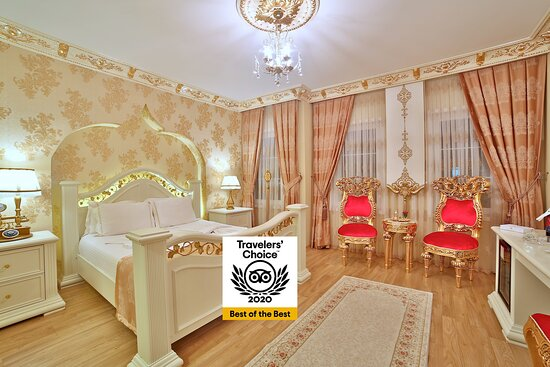

Hotel Name:  White House Hotel Istanbul
Similarity:  0.7392401
Average Rating Score:  5.0
Reviews:  ['We stay at white house hotel in turkey its a very nice hotel very clean and staff are very help breakfast buffet is really good i recommend if someone come to turkey stay with them .when you need help to go outside to explore the city staff and manager are really helpful to guide you .']


In [69]:
import spacy
from PIL import Image
import requests
nlp = spacy.load('en_core_web_sm')

############ Your Query Here ############

query = 'Best Hotel in Turkey'

#########################################

doc = nlp(query)
if doc.ents:
  city = str(doc.ents[0]).lower().capitalize()
  df_filtred = df[df['locality'] == city]
  if df_filtred.shape[0] == 0:
    df_filtred = df
else:
  city = None
  df_filtred = df
result = search(query, df_filtred)
print(result[0]["Image url"])
im = Image.open(requests.get(result[0]["Image url"], stream=True).raw)
display(im)
print("Hotel Name: ", result[0]["Hotel Name"])
print("Similarity: ", result[0]["Score"])
print("Average Rating Score: ", df[df["hotel_name"] == result[0]["Hotel Name"]]['rate'].mean())
print("Reviews: ", result[0]["Relevant_reviews"])

In [ ]:
!pip freeze > requirements.txt
